In [1]:
%matplotlib inline
import io
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import pandas as pd
import numpy as np
import random
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')
random.seed(1)

c:\users\hjl161\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
datafiles = [
             '../data/MTurk_anonymous.xlsx',
             '../data/DTU1_anonymous.xlsx',
             '../data/DTU2_anonymous.xlsx',
]

In [3]:
df_all = pd.DataFrame()
for datafile in datafiles:
    df = pd.DataFrame(pd.read_excel(datafile))
    df_all = df_all.append(df, sort=True)

Do some cleaning and reformatting:

In [4]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)], 
        axis = 1, inplace = True)
df = df[['arrival', 'choice']]
df['arrival'].replace({9.0: 8.6, 9.1: 8.7}, inplace=True)
df.head()

,arrival,choice
0,8.1,1
1,8.0,1
2,8.1,0
3,8.0,1
4,8.2,1


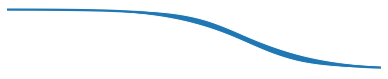

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(6.7, 1.2)
fig = sns.regplot(x='arrival', y='choice', data=df, 
                  scatter_kws={"color": "white"}, 
                  ci=95, n_boot=10000, logistic=True, ax=ax)
plt.setp(fig.collections[1], alpha=1) # setting translucency of CI to zero
fig.set(xlim=(8.2, 8.7))
fig.axis('off')
#plt.rcParams['figure.figsize']=(6.7,.2)
plt.rcParams["font.family"] = "sans-serif"
PLOTS_DIR = '../plots'

if not os.path.exists(PLOTS_DIR):
    os.makedirs(PLOTS_DIR)

plt.savefig(os.path.join(PLOTS_DIR, 'fig5_logit_all.png'),
            bbox_inches='tight', transparent=True, dpi=300)
plt.savefig(os.path.join(PLOTS_DIR, 'fig5_logit_all.pdf'), transparent=True, dpi=300)
sns.despine()